<a href="https://colab.research.google.com/github/julia0905/BADS/blob/master/2_ex_descriptive_analytics_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_descriptive_analytics.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is on cluster analysis.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Tutorial 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linspace()` for this purpose. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# define distribution parameters
mu    = 0
sigma = 1

# generate some x values
# you can control the number of generated points with the `num` argument
x = np.linspace(start = -3,
                stop  = 3,
                num   = 100)

Then, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *scipy.stats* library, which we import above. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable **nvValues**.

In [ ]:
# check function documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# `stats.norm.pdf` requires tree arguments: 
# - x:     random variable values
# - loc:   mean of the distribution
# - scale: standard deviation of the distribution

nvValues = stats.norm.pdf(x     = x,
                          loc   = mu, 
                          scale = sigma)

We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

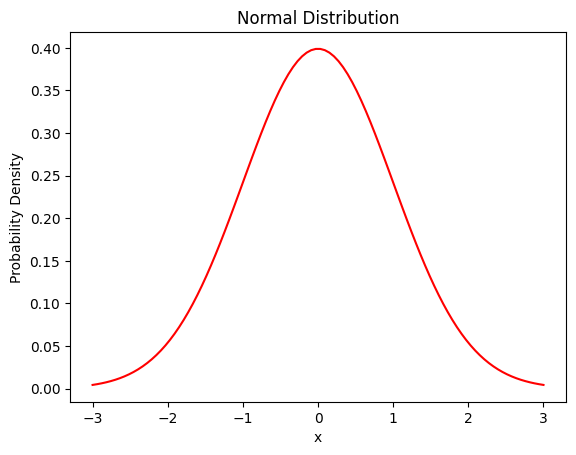

In [ ]:
# matplotlib is a powerful library with many customization options
# the documentation is available at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

# create a plot
plt.plot(x, nvValues, c = 'red') 

# customization: title. axes labels
plt.title("Normal Distribution")
plt.ylabel("Probability Density")
plt.xlabel("x")

# display plot
plt.show()

## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

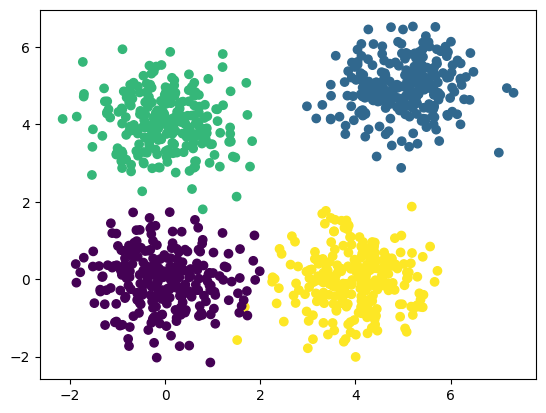

In [ ]:
# import library
from sklearn.datasets import make_blobs

# define parameters of the data to be generated
n       = 1000                             # no. samples
centers = [(0, 0), (5, 5), (0, 4), (4, 0)] # centers of each cluster
std     = 0.75                             # standard deviaton

# Call the function and obtain your data
X, y = make_blobs(n_samples    = n, 
                  centers      = centers, 
                  cluster_std  = std,
                  random_state = 2020)

# Scatter plot of the synthetic data
plt.scatter(X[:,0],X[:,1], c=y);  

## 2.2 kMeans
The second tutorial provided a *from scratch implementation* of the kMeans algorithm. Go back to the tutorial and copy/paste the relevant parts of the code into this notebook. This will allow you to run the algorithm here.

In [ ]:
# The following functions are copy/pasted from the kMeans from scratch notebook

def euclidean_distance(a, b):
    """Computes Euclidean distance between two arrays"""
    return np.sqrt(np.sum((a - b)**2))


def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    # creates empty array as long as samples for future labels
    labels = np.empty(n_samples)  

    for cluster_idx, cluster in enumerate(clusters):
        # assign labels to each sample
        for sample_index in cluster:
            labels[sample_index] = cluster_idx  
    return labels


def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroid to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters


def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    # calculate distance from each sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]  
    # take closest centroid (one with minimal distance)
    closest_index = np.argmin(distances)
    return closest_index


def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        # find new centroid by finding mean of all points assigned to centroid
        cluster_mean = np.mean(X[cluster, :], axis=0)
        centroids[cluster_idx] = cluster_mean  # collect all centroids
    return centroids


def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be the initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

In [ ]:
# clustering of the artificial data
clus_solu = KMeans_from_scratch(data=X, k_clusters=4, n_iter=10)

Total distance:  1065.7981726983346
Iterations:  3
Centroids: [[ 9.19575528e-03  4.05888714e+00]
 [-2.36289039e-02 -1.91701992e-02]
 [ 3.98469055e+00  3.06224857e-03]
 [ 5.00648156e+00  4.94152400e+00]]


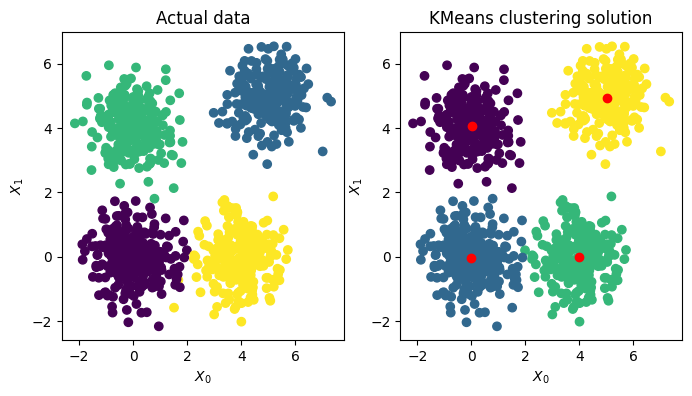

In [ ]:
# print information about the clustering results
print("Total distance: ", clus_solu[3])
print("Iterations: ", clus_solu[1])
print("Centroids:", clus_solu[2])

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Actual data")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=clus_solu[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("KMeans clustering solution")
plt.scatter(clus_solu[2][:,0], clus_solu[2][:,1], c='red')


plt.show()

## 2.3 Distance function
In the lecture, we argued that clustering methods and kMeans are versatile in that the support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. You can look up the formula of the cosine similarity in the lecture slides of chapter 2, or from the Internet. 

In [ ]:
# define a function that computes cosine similarity
def cosine_similarity(a, b):
    cosine_sim = np.dot(a, b) / (np.linalg.norm(a)*np.linalg.norm(b))
    return cosine_sim
    
test_1 = [1, 1]
test_2 = [1, 0]

cosine_similarity(test_1, test_2)

0.7071067811865475

In [ ]:
def cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)

In [ ]:
from scipy.spatial import distance
print(cosine_distance(test_1, test_2))
distance.cosine(test_1, test_2)


0.29289321881345254


0.29289321881345254

Next thing to do is to change our from scratch implementation of the kMeans algorithm such that it uses cosine similarity for clustering the data. To achieve this, write a new custom function `KMeans_with_cosine_similarity`. You can copy/paste the above implementation of the function `KMeans_from_scratch` to a large extent, and then add adjustments to exchange Euclidian distance with cosine distance. 

**Hint:** We aware of the fact that a similarity function and a distance function are two sides of the same coin but not identical. Once you are able to compute cosine *similarity* you need to adjust your *similarity* measure to obtain a *distance* measure. Afterwards, you can use conside *distance* within kMeans.

In [ ]:
# pick no. of clusters
# randomly pick centroids
# for each data point, find closet centroid
# update each centroid given current clustering
# keep going until stopping criterion is met

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroid to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid_cosine(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters

def find_closest_centroid_cosine(sample, centroids):
    """Distance from each sample to every centroid"""
    # calculate distance from each sample to each centroid
    distances = [cosine_distance(sample, point) for point in centroids]  
    # take closest centroid (one with minimal distance)
    closest_index = np.argmin(distances)
    return closest_index

def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [cosine_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be the initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [cosine_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [ ]:
# clustering solution with the modified KMeans
cosine_solu = KMeans_from_scratch(data=X, k_clusters=4, n_iter=3)
print("Total distance cosine ", cosine_solu[3])
print("Total distance Euclidean ", clus_solu[3])

print("No. iterations cosine ", cosine_solu[1])
print("No. iterations Euclidean ", clus_solu[1])

print("Centroids cosine", cosine_solu[2])
print("Centroids Euclidean", clus_solu[2])

Total distance cosine  15.816948059921678
Total distance Euclidean  1065.7981726983346
No. iterations cosine  100
No. iterations Euclidean  3
Centroids cosine [[-0.10116878  3.38618914]
 [-0.59601883 -0.4666132 ]
 [ 3.31419152 -0.11528326]
 [ 4.47382201  4.40126889]]
Centroids Euclidean [[ 9.19575528e-03  4.05888714e+00]
 [-2.36289039e-02 -1.91701992e-02]
 [ 3.98469055e+00  3.06224857e-03]
 [ 5.00648156e+00  4.94152400e+00]]


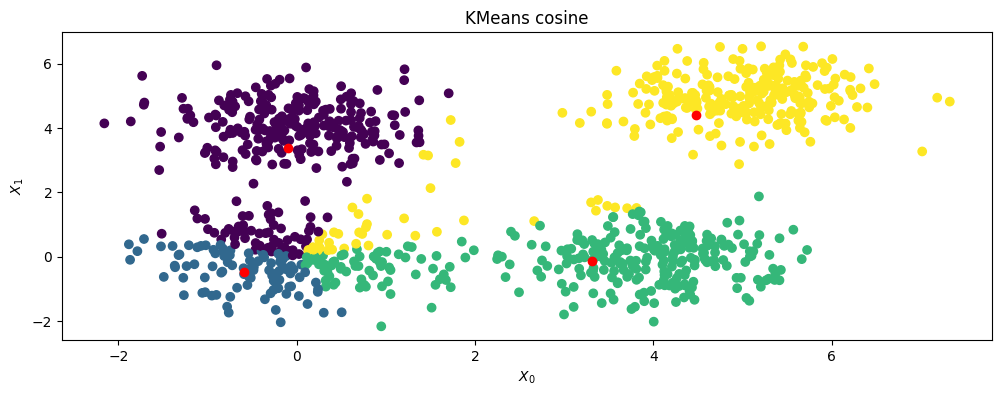

In [ ]:
# visual comparison of Euclidean to cosine distance

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Actual data")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=clus_solu[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("KMeans Euclidean")
plt.scatter(clus_solu[2][:,0], clus_solu[2][:,1], c='red')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=cosine_solu[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("KMeans cosine")
plt.scatter(cosine_solu[2][:,0], cosine_solu[2][:,1], c='red')

plt.show()

# 2.5 Alternative approach
The kMeans algorithm with cosine similarity can also be implemented more elegantly by normalizing the rows of $X$ to be of unit length. The reason being that if $X_1$ and $X_2$ are unit vectors, the term inside the brackets in the last line of the following equation is equivalent to the cosine distance.

\begin{align*}
\vert\vert X_1 - X_2 \vert\vert_2^2 &= X_1^T X_1 + X_2^T X_2 - 2 X_1^T X_2 \\
&= 2 - 2 X_1^T X_2 \\
&= 2 (1 - X_1^T X_2)
\end{align*}

Normalize $X$ before computing kMeans clusters with Euclidian distances. Compare your solution to that from task 2.4 and briefly note your findings.

## 2.6 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

# Done... puh, that was a lot of work. And you did it! Congratulations!!! 